# Gradient Descent Variants Challenge
## Calculus for Machine Learning

This notebook implements gradient descent variants from scratch:
- Linear regression problem setup (y = mx + b)
- Batch gradient descent implementation
- Stochastic gradient descent implementation
- Mini-batch gradient descent implementation
- Loss visualization and convergence comparison


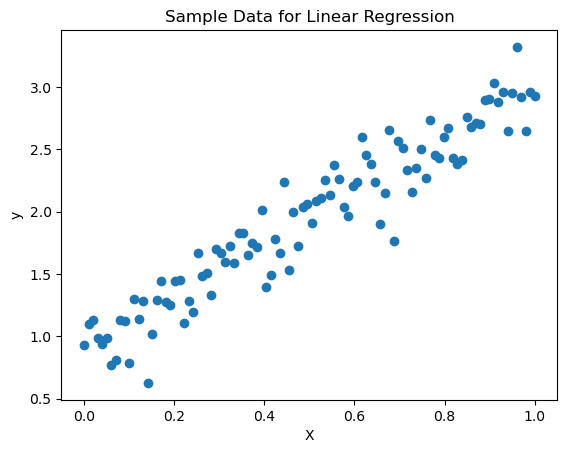

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 data points
X = np.linspace(0, 1, 100) 
noise = np.random.randn(100) * 0.2 # Some noise

# True parameters we're trying to find
true_m = 2
true_b = 1

# Calculate y using the linear equation y = mx + b + noise
y = true_m * X + true_b + noise

plt.scatter(X, y)
plt.title("Sample Data for Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Found parameters: m = 1.7800, b = 1.0750


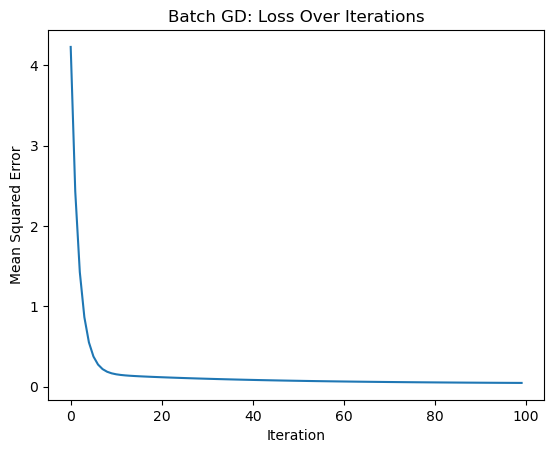

In [24]:
def batch_gradient_descent(X, y, learning_rate=0.1, iterations=100):
    # Start with random guesses for m and b
    m = 0
    b = 0
    n = len(X) # Number of data points
    
    loss_history = []
    
    for i in range(iterations):
        # 1. Calculate predictions for ALL data points using y = mx + b
        predictions = m * X + b
        
        # 2. Calculate the error (difference between predictions and true y)
        error = predictions - y
        
        gradient_m = (2/n) * np.sum(error * X)
        gradient_b = (2/n) * np.sum(error)
        
        m = m - learning_rate * gradient_m
        b = b - learning_rate * gradient_b
        
        loss = np.mean(error ** 2)
        loss_history.append(loss)

    return m, b, loss_history

m_batch, b_batch, loss_batch = batch_gradient_descent(X, y, 0.1, 100)

# Print the results and plot the loss
print(f"Found parameters: m = {m_batch:.4f}, b = {b_batch:.4f}")
plt.plot(loss_batch)
plt.title("Batch GD: Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.show()

Found parameters: m = 1.8323, b = 0.9736


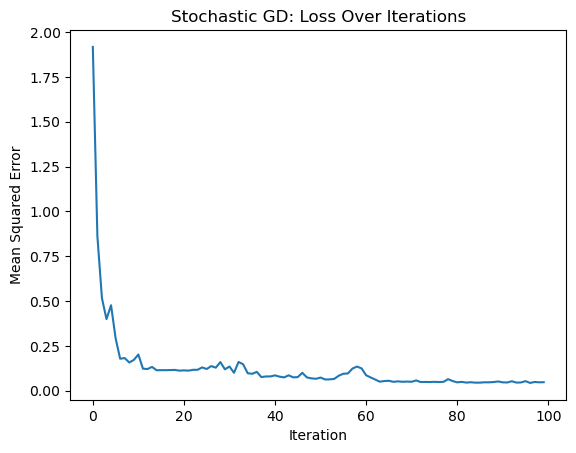

In [25]:
def stochastic_gradient_descent(X, y, learning_rate=0.1, iterations=100):
    m = 0
    b = 0
    n = len(X)
    loss_history = []
    
    for i in range(iterations):
        # Pick one random data point
        rand_index = np.random.randint(0, n)
        x_i = X[rand_index]
        y_i = y[rand_index]
        
        # 1. Calculate prediction for ONE point
        prediction = m * x_i + b

        # 2. Calculate error for ONE point
        error = prediction - y_i
        
        # 3. Calculate gradients for ONE point (no sum or average)
        gradient_m = 2 * x_i * (prediction - y_i)
        gradient_b = 2 * (prediction - y_i)

        # 4. Update parameters
        m = m - learning_rate * gradient_m
        b = b - learning_rate * gradient_b
        
        # 5. Optional: Calculate loss on the whole dataset to see progress
        total_loss = np.mean((m * X + b - y)**2)
        loss_history.append(total_loss)
        
    return m, b, loss_history

m_sgd, b_sgd, loss_sgd = stochastic_gradient_descent(X, y, 0.1, 100)

# Print the results and plot the loss
print(f"Found parameters: m = {m_sgd:.4f}, b = {b_sgd:.4f}")
plt.plot(loss_sgd)
plt.title("Stochastic GD: Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.show()

Found parameters: m = 1.8154, b = 1.0786


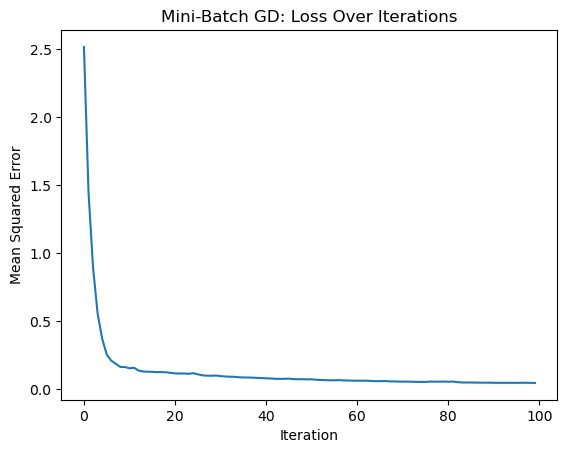

In [26]:
def mini_batch_gradient_descent(X, y, learning_rate=0.1, iterations=100, batch_size=8):
    m = 0
    b = 0
    n = len(X)
    loss_history = []
    
    for i in range(iterations):
        # Select a random mini-batch of indices
        rand_indices = np.random.choice(n, size=batch_size, replace=False)
        
        # Use indices to slice the data
        x_batch = X[rand_indices]
        y_batch = y[rand_indices]
        
        # 1. Calculate predictions for the mini-batch
        predictions = m * x_batch + b

        # 2. Calculate error for the mini-batch
        error = predictions - y_batch
        
        # 3. Calculate gradients (use batch_size instead of n)
        gradient_m = (2/batch_size) * np.sum(error * x_batch)
        gradient_b = (2/batch_size) * np.sum(error)

        # 4. Update parameters
        m = m - learning_rate * gradient_m
        b = b - learning_rate * gradient_b
        
        # 5. Optional: Calculate loss on the whole dataset
        total_loss = np.mean((m * X + b - y)**2)
        loss_history.append(total_loss)
        
    return m, b, loss_history

m_mini, b_mini, loss_mini = mini_batch_gradient_descent(X, y, 0.1, 100, 8)

# Print the results and plot the loss
print(f"Found parameters: m = {m_mini:.4f}, b = {b_mini:.4f}")
plt.plot(loss_mini)
plt.title("Mini-Batch GD: Loss Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.show()

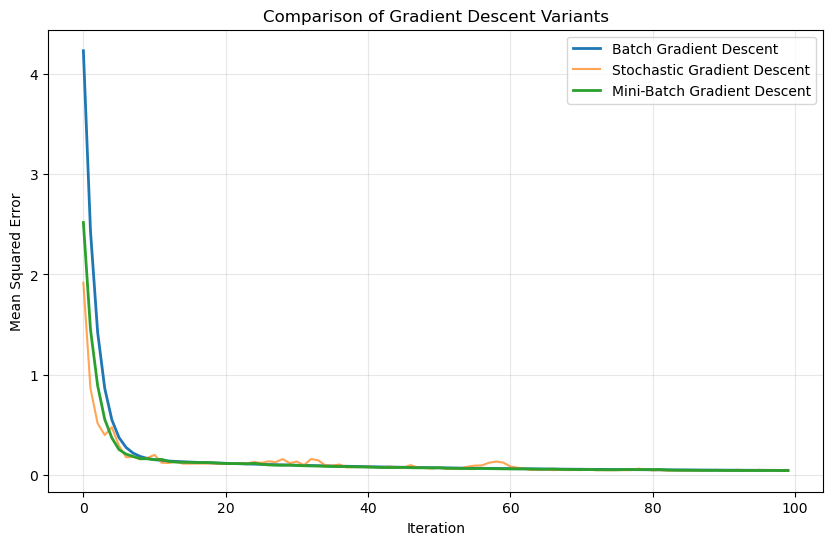


Final Parameters Comparison:
Batch GD:      m = 1.7800, b = 1.0750
Stochastic GD: m = 1.8323, b = 0.9736
Mini-Batch GD: m = 1.8154, b = 1.0786
True values:   m = 2.0000, b = 1.0000


In [27]:
# Compare all three gradient descent variants
plt.figure(figsize=(10, 6))
plt.plot(loss_batch, label='Batch Gradient Descent', linewidth=2)
plt.plot(loss_sgd, label='Stochastic Gradient Descent', alpha=0.7)
plt.plot(loss_mini, label='Mini-Batch Gradient Descent', linewidth=2)
plt.title("Comparison of Gradient Descent Variants")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print final parameters for comparison
print("\nFinal Parameters Comparison:")
print(f"Batch GD:      m = {m_batch:.4f}, b = {b_batch:.4f}")
print(f"Stochastic GD: m = {m_sgd:.4f}, b = {b_sgd:.4f}")
print(f"Mini-Batch GD: m = {m_mini:.4f}, b = {b_mini:.4f}")
print(f"True values:   m = {true_m:.4f}, b = {true_b:.4f}")
